Launch a new python notebook and read the data set. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points
Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)
Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Numerical libraries
import numpy as np   
from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#standard scaler
from sklearn.preprocessing import StandardScaler

#metrices
from sklearn import metrics

In [133]:
#replacing junk values with NAN
missing_values = ["n/a", "na", " ","NAN", "?"]
car_df = pd.read_csv("cars-dataset.csv", na_values = missing_values)
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [134]:
car_df.info()
#hp is of object type so we have to convert it into integer as well 
#here mpg is our dependent column and rest all are independent column
#also car name doesnot contribute value to the 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [135]:
car_df.isnull().sum()
#Other than hp none of the coulmns have NAN values. hp has 6 NAN values. 

car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [137]:
#converting the hp column of object type to float type.
car_df['hp'] = car_df['hp'].astype('float64')
#car_df.info()

#Imputing median values into the column having missing values.
median = car_df['hp'].median()
car_df['hp'].fillna(median, inplace=True)
#car_df['hp']= car_df['hp'].apply(lambda x: x.fillna(x.median()))
car_df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [138]:
#also car name doesnot contribute value to the value of mpg which is our dependent column
car_df=car_df.drop(['car name'], axis=1)
car_df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


Data Visualization

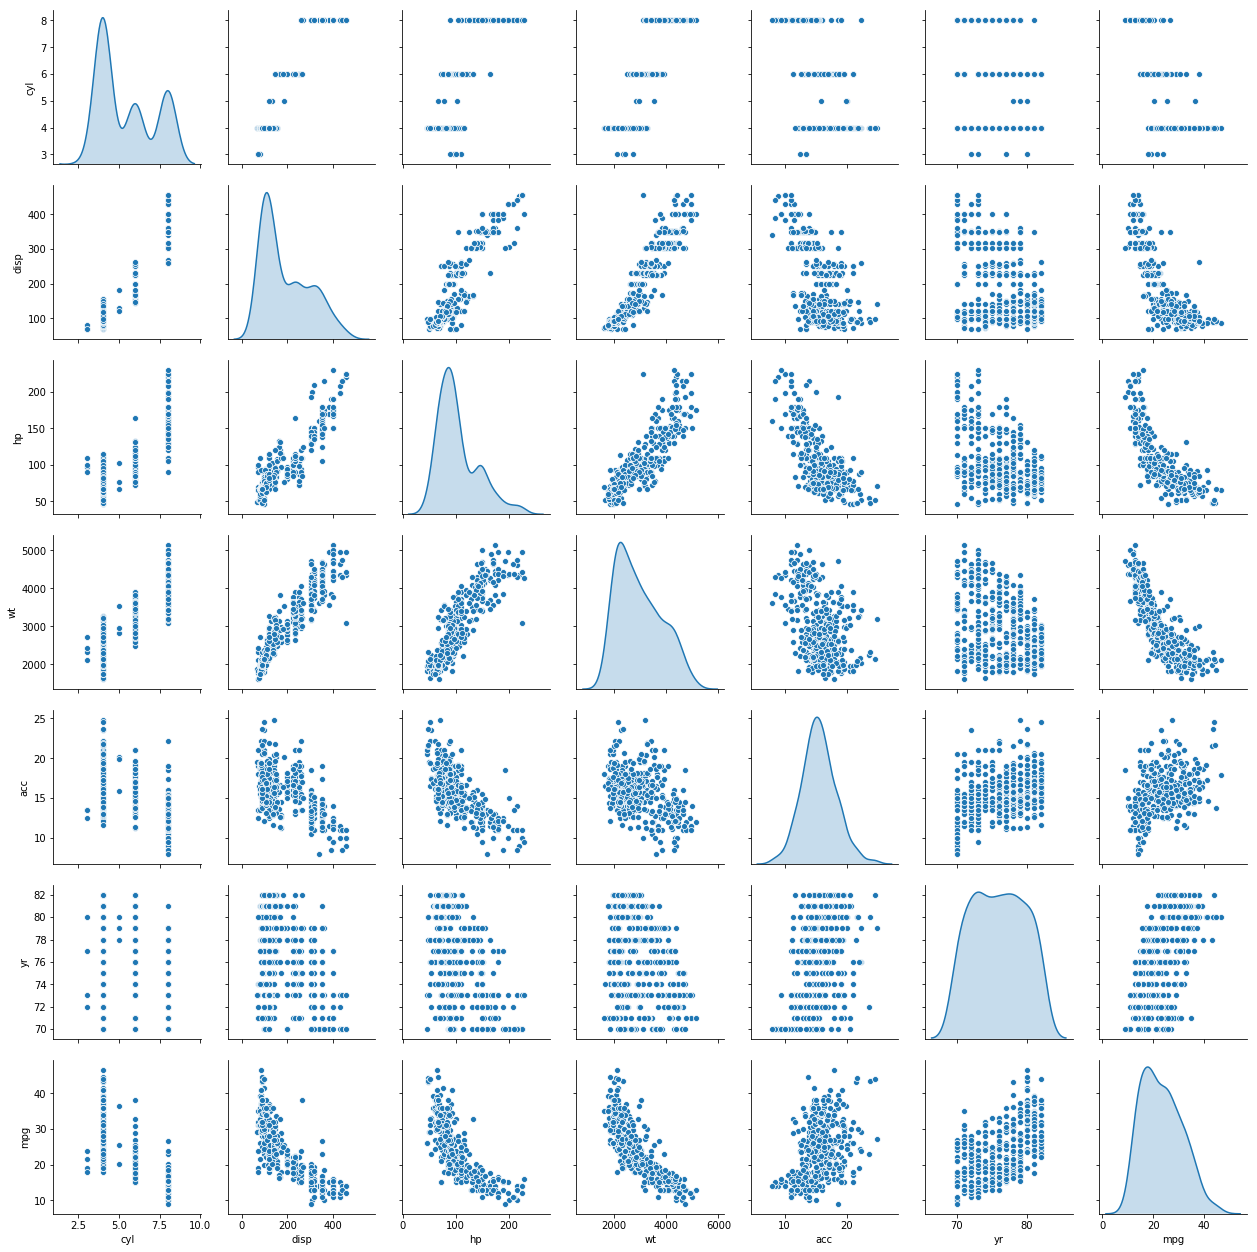

In [95]:
#car_df_plot_attr = car_df.drop(['car name'], axis=1)
sns.pairplot(car_df, diag_kind='kde')   # to plot density curve instead of histogram

In [ ]:
# from the above pair plot we can clearly see 3 clusters . We can also see multicolinearity between features and class.
#We have to reduce the multicolinearity it . Using VIF to remove those features which have vif>5 

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    
X = car_df[['cyl','disp','hp','wt','acc','yr','mpg']] # Selecting the predictors i.e. the independent variables

# Defining the function that you will run later
def calculate_vif_(X, thresh=100) :
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
        
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True
    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

 


In [140]:
X =  car_df
#Y =  car_df["car name"]
X2 = calculate_vif_(X,5) # Actually running the function

dropping 'yr' at index: 5
Remaining variables:
Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'mpg'], dtype='object')


In [141]:
from scipy.stats import zscore
X_z = X2.apply(zscore)
#standardizing the new data set

In [142]:
#Clustring the new standardised data set

cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,944.289955
1,3,609.265388
2,4,492.519413
3,5,423.316461


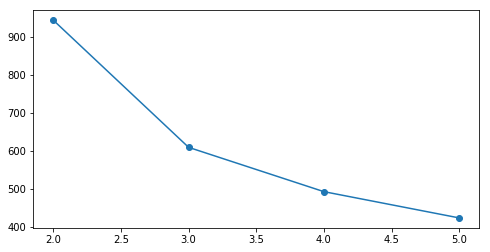

In [143]:
# Elbow plot

plt.figure(figsize=(8,4))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters


Checking with 3 clusters and assinging the data points to the new clustures

In [144]:
#applying K means clustering model  to the data set
X_z_copy = X_z.copy(deep = True)
kmeans= KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
prediction = kmeans.fit_predict(X_z)



In [145]:
#assigning predicted clusterids to the X_z data set
X_z["GROUP"] = prediction 
X_z.head()


,cyl,disp,hp,wt,acc,mpg,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543,1


In [146]:
# assigning a new name to the data set for readability
new_dataset_3cluster = X_z
new_dataset_3cluster.head()

,cyl,disp,hp,wt,acc,mpg,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543,1


F:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
F:\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
F:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


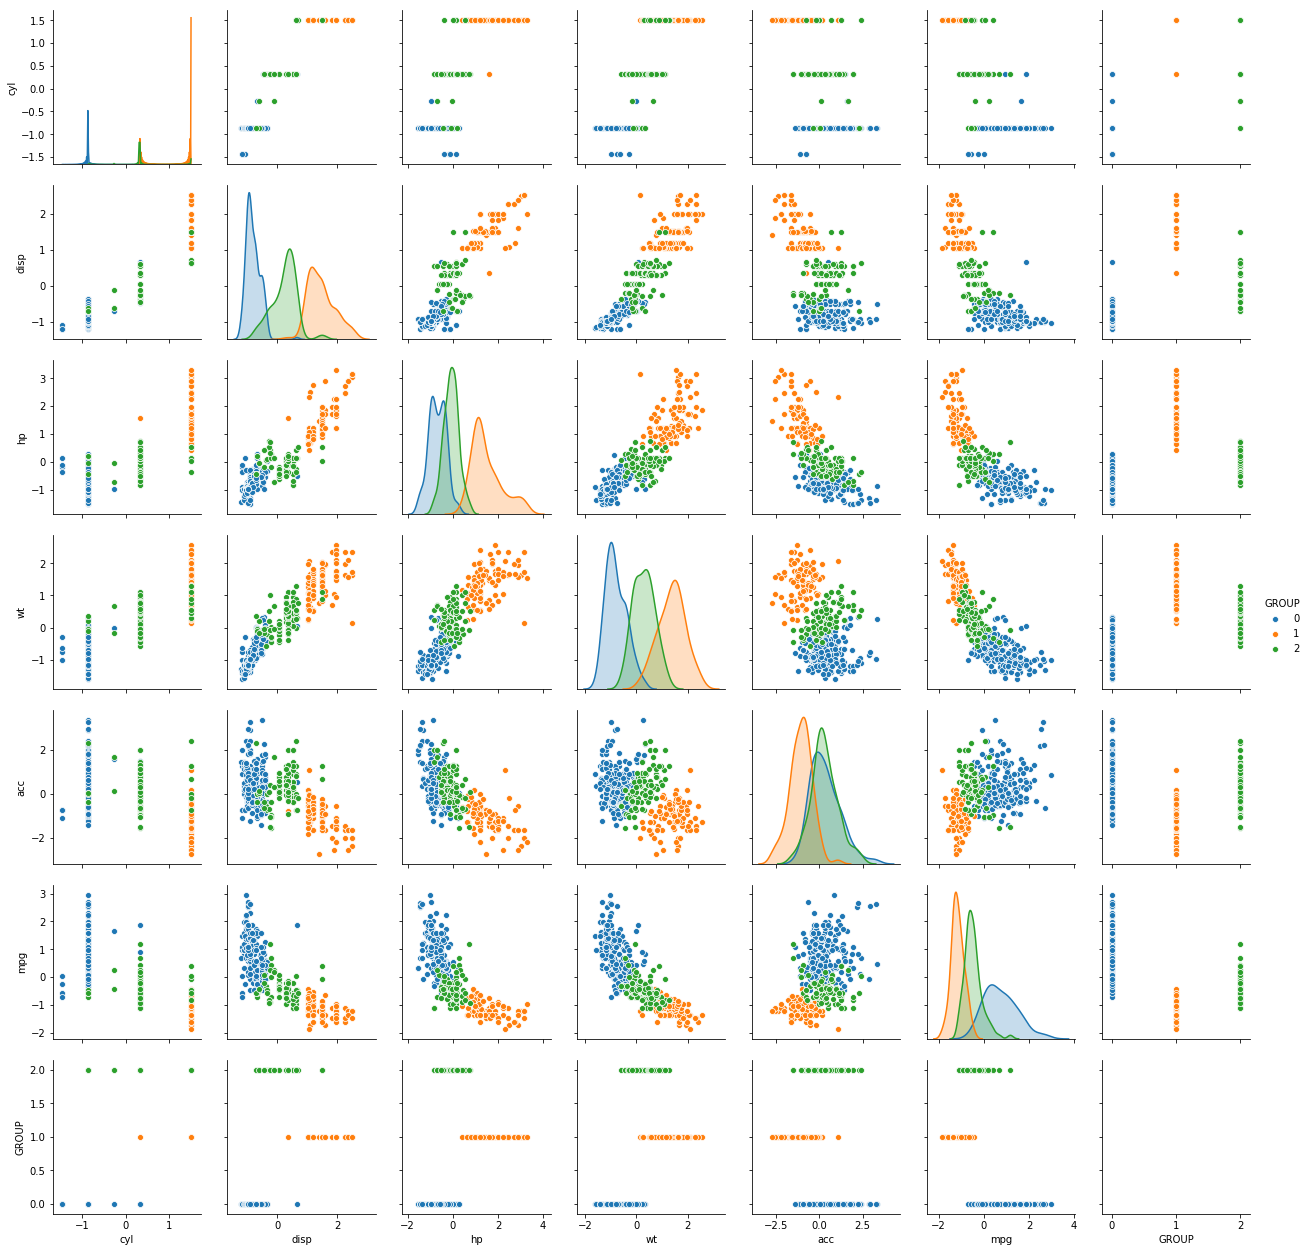

In [68]:
sns.pairplot(new_dataset_3cluster, diag_kind='kde', hue='GROUP')   # to plot density curve instead of histogram

Checking with 4 clusters and assinging the data points to the new clustures

In [147]:
kmeans= KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
prediction = kmeans.fit_predict(X_z_copy)

In [148]:
#assigning predicted clusterids to the X_z data set
X_z_copy["GROUP"] = prediction 
X_z_copy.head()

,cyl,disp,hp,wt,acc,mpg,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543,1


In [149]:
# assigning a new name to the data set for readability
new_dataset_4cluster = X_z_copy
new_dataset_4cluster.head()

,cyl,disp,hp,wt,acc,mpg,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543,1


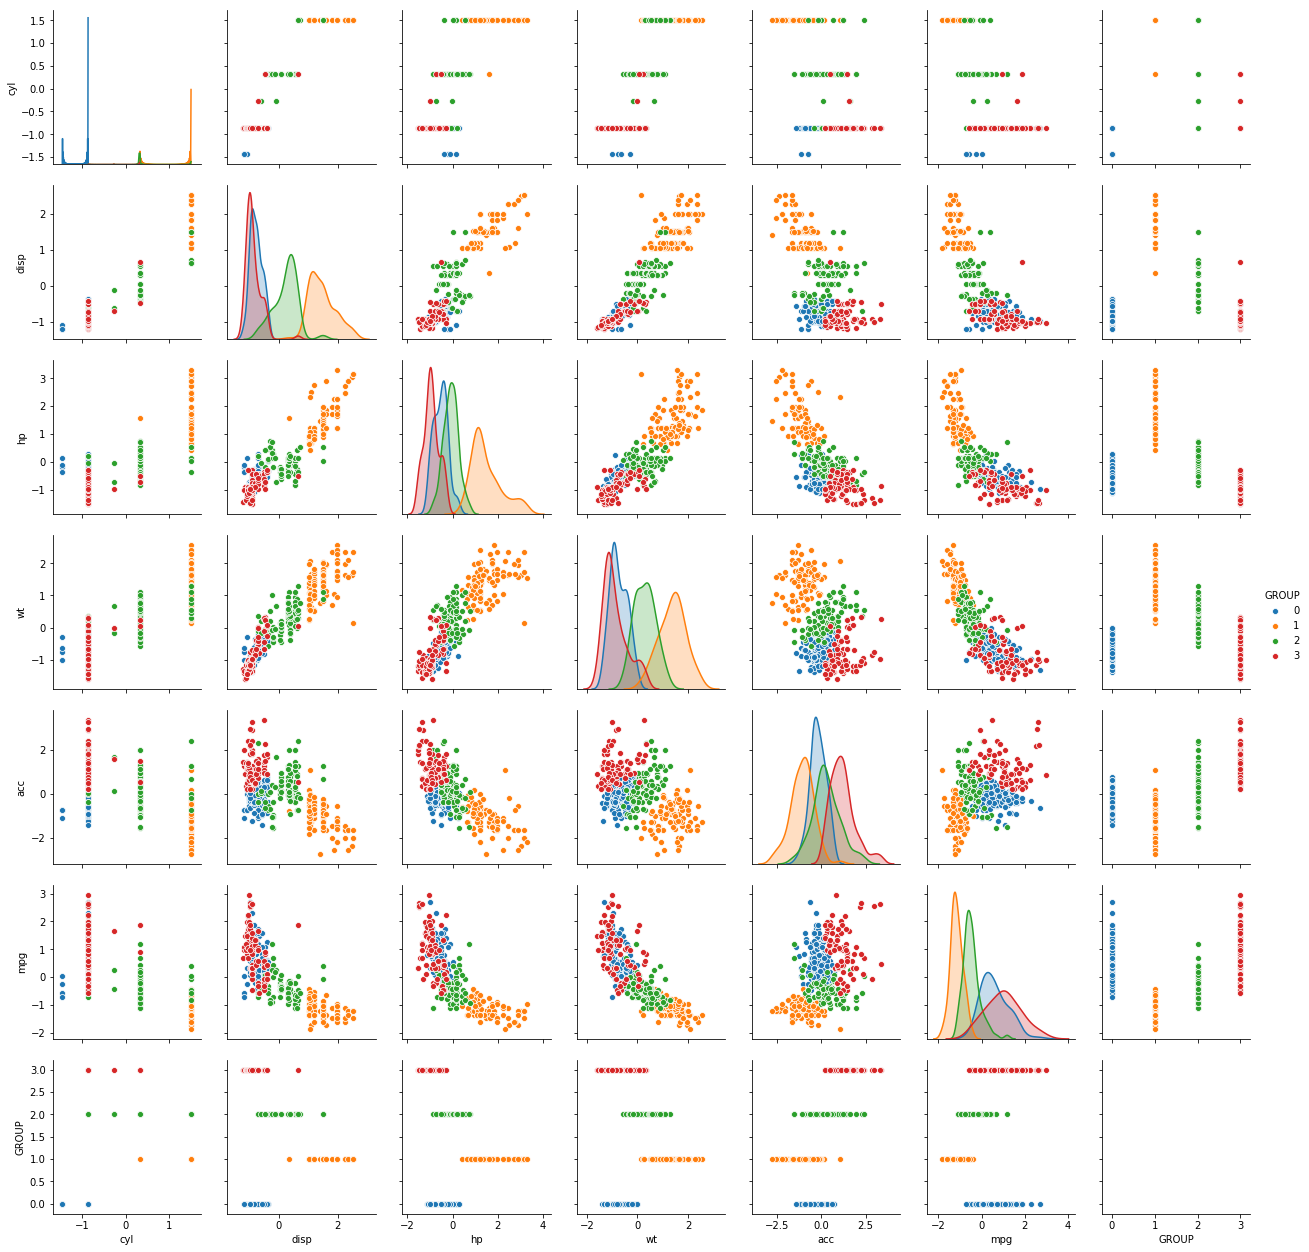

In [69]:
sns.pairplot(new_dataset_4cluster, diag_kind='kde', hue='GROUP') 

There is lot of overlapping between clusters with 3 clusters whereas clusters are clearly visible with 4 clusters as there is significant reduction in error we will go with 4 clusters and apply logistic regression 

In [150]:
#converting one dataset to 3 different datasets to apply linear regression on each cluster.
cluster1 = pd.DataFrame(new_dataset_4cluster[new_dataset_4cluster['GROUP'] == 0]) 
cluster2 = pd.DataFrame(new_dataset_4cluster[new_dataset_4cluster['GROUP'] == 1])
cluster3 = pd.DataFrame(new_dataset_4cluster[new_dataset_4cluster['GROUP'] == 2])
cluster4 = pd.DataFrame(new_dataset_4cluster[new_dataset_4cluster['GROUP'] == 3])
print(cluster1.info())
print(cluster2.info())
print(cluster3.info())
print(cluster4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 15 to 389
Data columns (total 7 columns):
cyl      87 non-null float64
disp     87 non-null float64
hp       87 non-null float64
wt       87 non-null float64
acc      87 non-null float64
mpg      87 non-null float64
GROUP    87 non-null int32
dtypes: float64(6), int32(1)
memory usage: 5.1 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 292
Data columns (total 7 columns):
cyl      97 non-null float64
disp     97 non-null float64
hp       97 non-null float64
wt       97 non-null float64
acc      97 non-null float64
mpg      97 non-null float64
GROUP    97 non-null int32
dtypes: float64(6), int32(1)
memory usage: 5.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 14 to 395
Data columns (total 7 columns):
cyl      133 non-null float64
disp     133 non-null float64
hp       133 non-null float64
wt       133 non-null float64
acc      133 non-null float64
mpg      133 non-null floa

Applying logistic regression on each cluster

In [168]:
cluster_list=[cluster1,cluster2,cluster3,cluster4] #putting all clusters in a list
clus_tbl_result=pd.DataFrame() #empty data set to fill it on real time with result of each cluster
for i,clusnumber in enumerate(cluster_list) :
    X =cluster_list[i].drop(["mpg", "GROUP"], axis=1)
    Y =cluster_list[i]["mpg"]
    test_size = 0.20 # taking 70:30 training and test set
    seed = 7  # Random numbmer seeding for reapeatability of the code
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_predict_train = model.predict(X_train)
    Y_predict_test = model.predict(X_test)
    mse_train = metrics.mean_squared_error(Y_predict_train, Y_train)
    trainRmse = np.sqrt(mse_train)
    mse_test = metrics.mean_squared_error(Y_predict_test, Y_test)
    testRmse = np.sqrt(mse_test)
    clus_tbl_result = clus_tbl_result.append({'Cluster Number': i, 'Train RMSE': trainRmse, 'Test RMSE': testRmse,'Intercept': model.intercept_, 'Coefficient': np.around(model.coef_,3)}, ignore_index=True)

In [169]:
clus_tbl_result #table to print the  clusters with their corresponding co-efficient, intecept and their RMSE scores

,Cluster Number,Coefficient,Intercept,Test RMSE,Train RMSE
0,0.0,"[0.498, -0.096, 0.173, -0.482, 0.085]",-0.528954,0.399330,0.268063
1,1.0,"[-0.307, 0.041, -0.205, -0.168, -0.14]",-0.352232,0.255440,0.206812
2,2.0,"[0.771, 0.399, -1.046, -0.395, -0.307]",0.629040,0.524118,0.460665
3,3.0,"[1.022, -0.39, -1.116, -0.106, -0.26]",0.733013,0.717098,0.659641
